# Assignment1: PyTorch Classification
* Cifar10 dataset에 대해 정확도 97% 이상의 Classifier를 만드세요
* 코드 수정 가능 (단, 첫 번째 cell은 건드리지 말 것)
* Hint. 모델 디자인 뿐만 아니라 transfer learning, batch size 및 learning rates 조절, data augmentation 등을 통해 분류기 정확도를 높일 수 있음. (https://pytorch.org/vision/stable/transforms.html)
* 단, transfer learning 사용 시, cifar10에 학습된 모델을 사용하는 것은 금지함.

## 아래 코드는 Shallow CNN을 사용한 예시 코드입니다.
* 바로 아래 위치한 셀은 수정하시면 안됩니다.

In [43]:
from matplotlib import pyplot as plt
import torch
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import random
import numpy as np

# Do not touch codes below!
# These codes control random seed for reproduction
seed = 7777

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [44]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device=="cuda": torch.cuda.empty_cache()
device

device(type='cuda')

#### Dataset CIFAR10 download

In [45]:
img_dir = './CIFAR10'


transform_with_augmentation = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.RandomHorizontalFlip(),  # 무작위로 이미지를 좌우로 뒤집음
    transforms.RandomRotation(degrees=15),  # 무작위로 이미지를 최대 15도 회전
    transforms.ToTensor()  # 이미지를 텐서로 변환
])
transform = transforms.Compose([
    transforms.Resize((240, 240)),
    transforms.ToTensor()
])

cifar10_train = datasets.CIFAR10(
    img_dir, download=True, transform=transform_with_augmentation, train=True)

cifar10_test = datasets.CIFAR10(
    img_dir, download=True, transform = transform, train=False)

dataloader_train = DataLoader(cifar10_train, 
                              batch_size=32, 
                              shuffle=True)

dataloader_test = DataLoader(cifar10_test, 
                              batch_size=32, 
                              shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


#### Check images

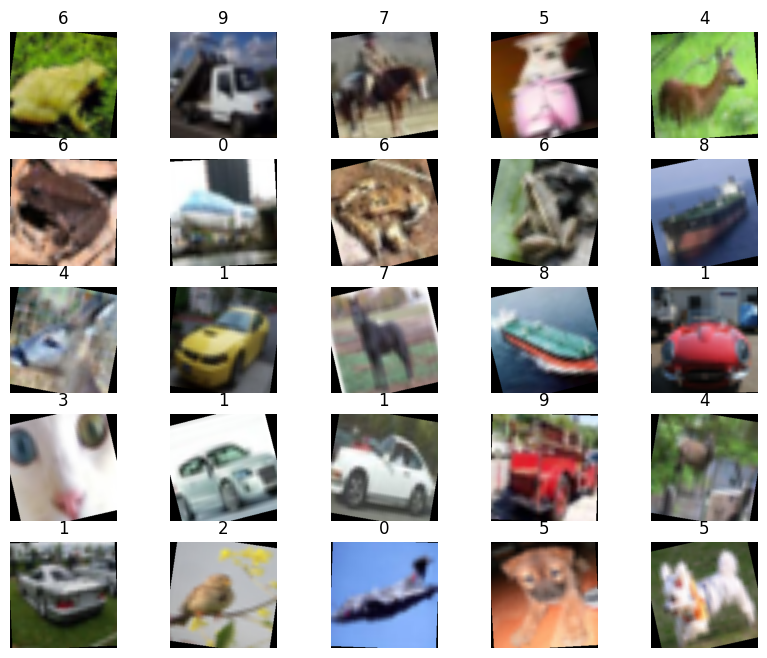

In [46]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(cifar10_train), size=(1,)).item()
    img, label = cifar10_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.permute(1,2,0).squeeze(), cmap="gray")
plt.show()

#### Basic model using CNN
##### structure
- Convolution 1 : channels 16, kernel size 5, stride 1, padding 2 (output resolution?)
- ReLU
- MaxPool : kernel_size 2, stride 2
- Convlution 2 : channels 32, kernel size 5, stride 1, padding 2 (output resolution?)
- Linear : output channels 10 

##### This model below is just for an example

##### https://pytorch.org/docs/1.12/nn.html

In [47]:
# class CNN(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Sequential(         
#             nn.Conv2d(
#                 in_channels=3,              
#                 out_channels=16,            
#                 kernel_size=5,              
#                 stride=1,                   
#                 padding=2,                  
#             ),                              
#             nn.ReLU(),                      
#             nn.MaxPool2d(kernel_size=2),    
#         )
#         self.conv2 = nn.Sequential(         
#             nn.Conv2d(16, 32, 5, 1, 2),     
#             nn.ReLU(),                      
#             nn.MaxPool2d(2),                
#         )
#         # fully connected layer, output 10 classes
#         self.out = nn.Linear(32 * 8 * 8, 10)
#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)
#         # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
#         x = x.view(x.size(0), -1)       
#         output = self.out(x)
#         return output  

#### Train

In [48]:
# device = 'cuda'
# cnn = CNN().to(device)
# loss_func = nn.CrossEntropyLoss()   
# optimizer = optim.SGD(cnn.parameters(), lr=0.01, momentum=0.9)

In [49]:
# import copy

# # Train the model
# num_epochs = 10

# model_best = None
# acc_best = 0

# for epoch in range(num_epochs):
#     running_loss = 0.0
#     running_corrects = 0

#     cnn.train()
#     for i, (images, labels) in enumerate(dataloader_train):
#         images = images.to(device)
#         labels = labels.to(device)
#         output = cnn(images)     
#         _, preds = torch.max(output, 1)     
#         loss = loss_func(output, labels)

#         # clear gradients for this training step   
#         optimizer.zero_grad()           

#         # backpropagation, compute gradients 
#         loss.backward()    
#         # apply gradients             
#         optimizer.step()        
        
#         running_loss += loss.item() * images.size(0)
#         running_corrects += torch.sum(preds == labels.data)
    
#     epoch_loss = running_loss / len(cifar10_train)
#     epoch_acc = running_corrects.double() / len(cifar10_train)
#     print ('Epoch [{}/{}], Train -> Loss: {:.4f}, Acc: {:.4f}' 
#                    .format(epoch + 1, num_epochs, epoch_loss, epoch_acc))
        
    
#     running_loss = 0.0
#     running_corrects = 0
#     cnn.eval()
#     with torch.no_grad():
#         for i, (images, labels) in enumerate(dataloader_test):
#             images = images.to(device)
#             labels = labels.to(device)
            
#             # Inference
#             output = cnn(images)
#             _, preds = torch.max(output, 1)     
    
#             # Calculate loss
#             loss = loss_func(output, labels)
    
#             running_loss += loss.item() * images.size(0)
#             running_corrects += torch.sum(preds == labels.data)

#     # 통계값
#     epoch_loss = running_loss / len(cifar10_test)
#     epoch_acc = running_corrects.double() / len(cifar10_test)

#     print ('Epoch [{}/{}], Valid -> Loss: {:.4f}, Acc: {:.4f}' 
#                .format(epoch + 1, num_epochs, epoch_loss, epoch_acc))

#     # Fine the best model
#     if acc_best < epoch_acc:
#         acc_best = epoch_acc
#         model_best = copy.deepcopy(cnn)

#### Test

In [50]:

# model_best.eval()
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in dataloader_test:
#         images = images.to(device)
#         labels = labels.to(device)
        
#         # Inference
#         test_output = model_best(images)

#         # Calculate error
#         pred_y = torch.max(test_output, 1)[1].data.squeeze() # max 를 통해 가장 확률이 높은 숫자를 선택
#         correct += (pred_y == labels).sum().item() # 가장 확률이 높은 숫자인 pred_y와 label이 같으면 정답 - 정답인 개수 확인
#         total += labels.size(0) 
#     accuracy = correct / total * 100
    
# print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

#### Save the model checkpoint

In [51]:
# torch.save(model_best.state_dict(), 'trained_model.pkl')

#### Load the trained model and test

In [52]:
# model_load = CNN().to(device)
# model_load.load_state_dict(torch.load('trained_model.pkl'))

# model_load.eval()
# with torch.no_grad():
#     correct = 0
#     total = 0
#     for images, labels in dataloader_test:
#         images = images.to(device)
#         labels = labels.to(device)
        
#         # Inference
#         test_output = model_load(images)

#         # Calculate error
#         pred_y = torch.max(test_output, 1)[1].data.squeeze() # max 를 통해 가장 확률이 높은 숫자를 선택
#         correct += (pred_y == labels).sum().item() # 가장 확률이 높은 숫자인 pred_y와 label이 같으면 정답 - 정답인 개수 확인
#         total += labels.size(0) 
#     accuracy = correct / total * 100
    
# print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

# Try your own codes!
* 과제로 제출한 checkpoint를 'torch.load' 및 'torch.load_state_dict'를 사용해 불러온 후, accuracy를 측정할 예정입니다.
* 위의 Save 및 Load 코드를 기반으로 여러분이 직접 학습한 모델의 checkpoint가 잘 동작하는지 확인하시기 바랍니다.

In [53]:
# import os
# import time

# import numpy as np
# import pandas as pd

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import DataLoader
# from torch.utils.data.dataset import Subset

# from torchvision import datasets
# from torchvision import transforms

# import matplotlib.pyplot as plt
# from PIL import Image


# if torch.cuda.is_available():
#     torch.backends.cudnn.deterministic = True

In [63]:
model_ft = models.efficientnet_b2(pretrained=True)
# print(model_ft.classifier.type) ########
num_ftrs = model_ft.classifier[1].in_features
# print(num_ftrs) ######
model_ft.fc = nn.Linear(num_ftrs, 10).cuda()

model = model_ft.to(device)

In [55]:
import torch

def custom_lr_scheduler(optimizer, epoch):
    lr = 0.01
    if (epoch % 30 == 0):
        lr /= 10  # 에폭이 5일 때 학습률을 0.1로 나눠 줄입니다.
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [56]:
from torch.optim import lr_scheduler

torch.manual_seed(seed)

# model = densenet121()
# model.to(device)
loss_func = nn.CrossEntropyLoss()   

# optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)  

optimizer = optim.AdamW(model.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.001, amsgrad=False)




# exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)


# device = 'cuda'
# cnn = CNN().to(device)

# optimizer = optim.SGD(cnn.parameters(), lr=0.01, momentum=0.9)

## Train

In [57]:
import copy

# Train the model
num_epochs = 100

model_best = None
acc_best = 0

for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    custom_lr_scheduler(optimizer, epoch)
    model.train()
    for i, (images, labels) in enumerate(dataloader_train):
        images = images.to(device)
        labels = labels.to(device)
        output = model(images)     
        _, preds = torch.max(output, 1)     
        loss = loss_func(output, labels)

        # clear gradients for this training step   
        optimizer.zero_grad()           

        # backpropagation, compute gradients 
        loss.backward()    
        # apply gradients             
        optimizer.step()        
        
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = running_loss / len(cifar10_train)
    epoch_acc = running_corrects.double() / len(cifar10_train)
    print ('Epoch [{}/{}], Train -> Loss: {:.4f}, Acc: {:.4f}' 
                   .format(epoch + 1, num_epochs, epoch_loss, epoch_acc))
        
    
    running_loss = 0.0
    running_corrects = 0
    model.eval()
    with torch.no_grad():
        for i, (images, labels) in enumerate(dataloader_test):
            images = images.to(device)
            labels = labels.to(device)
            
            # Inference
            output = model(images)
            _, preds = torch.max(output, 1)     
    
            # Calculate loss
            loss = loss_func(output, labels)
    
            running_loss += loss.item() * images.size(0)
            running_corrects += torch.sum(preds == labels.data)

    # 통계값
    epoch_loss = running_loss / len(cifar10_test)
    epoch_acc = running_corrects.double() / len(cifar10_test)

    print ('Epoch [{}/{}], Valid -> Loss: {:.4f}, Acc: {:.4f}' 
               .format(epoch + 1, num_epochs, epoch_loss, epoch_acc))

    # Fine the best model
    if acc_best < epoch_acc:
        acc_best = epoch_acc
        model_best = copy.deepcopy(model)

Epoch [1/100], Train -> Loss: 0.4601, Acc: 0.8527
Epoch [1/100], Valid -> Loss: 0.2644, Acc: 0.9113
Epoch [2/100], Train -> Loss: 1.2324, Acc: 0.5624
Epoch [2/100], Valid -> Loss: 0.9512, Acc: 0.6722
Epoch [3/100], Train -> Loss: 0.8364, Acc: 0.7145
Epoch [3/100], Valid -> Loss: 0.6990, Acc: 0.7565
Epoch [4/100], Train -> Loss: 0.7067, Acc: 0.7590
Epoch [4/100], Valid -> Loss: 0.6340, Acc: 0.7845
Epoch [5/100], Train -> Loss: 0.6334, Acc: 0.7848
Epoch [5/100], Valid -> Loss: 0.5542, Acc: 0.8124
Epoch [6/100], Train -> Loss: 0.5675, Acc: 0.8084
Epoch [6/100], Valid -> Loss: 0.4826, Acc: 0.8345
Epoch [7/100], Train -> Loss: 0.5202, Acc: 0.8230
Epoch [7/100], Valid -> Loss: 0.4895, Acc: 0.8349
Epoch [8/100], Train -> Loss: 0.4812, Acc: 0.8364
Epoch [8/100], Valid -> Loss: 0.4175, Acc: 0.8624
Epoch [9/100], Train -> Loss: 0.4484, Acc: 0.8487
Epoch [9/100], Valid -> Loss: 0.4371, Acc: 0.8534
Epoch [10/100], Train -> Loss: 0.4211, Acc: 0.8568
Epoch [10/100], Valid -> Loss: 0.4113, Acc: 0.861

In [58]:

model_best.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader_test:
        images = images.to(device)
        labels = labels.to(device)
        
        # Inference
        test_output = model_best(images)

        # Calculate error
        pred_y = torch.max(test_output, 1)[1].data.squeeze() # max 를 통해 가장 확률이 높은 숫자를 선택
        correct += (pred_y == labels).sum().item() # 가장 확률이 높은 숫자인 pred_y와 label이 같으면 정답 - 정답인 개수 확인
        total += labels.size(0) 
    accuracy = correct / total * 100
    
print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

Test Accuracy of the model on the 10000 test images: 93.90 Percent


### Save the check point

In [59]:
torch.save(model_best.state_dict(), 'trained_model.pkl')

In [61]:
model_load = model_ft.to(device)
model_load.load_state_dict(torch.load('trained_model.pkl'))

model_load.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader_test:
        images = images.to(device)
        
        labels = labels.to(device)
        # Inference
        test_output = model_load(images)

        # Calculate error
        pred_y = torch.max(test_output, 1)[1].data.squeeze() # max 를 통해 가장 확률이 높은 숫자를 선택
        correct += (pred_y == labels).sum().item() # 가장 확률이 높은 숫자인 pred_y와 label이 같으면 정답 - 정답인 개수 확인
        total += labels.size(0) 
    accuracy = correct / total * 100
    
print('Test Accuracy of the model on the 10000 test images: %.2f Percent' % accuracy)

Test Accuracy of the model on the 10000 test images: 93.90 Percent
